As you might be well aware of Big Data isn't going anywhere anytime soon. Big Data Analytics, an active research area which is concerned with analyzing large scale, fast paced and varying types of data will stay a challenging field.

You might ask yourself - how this is linked to Principal Component Analysis? This statistical analysis is able to deal with one characteristic trait of Big Data. As you may recall *Big Data* is primarly characterized by [four Vs](https://www.ibmbigdatahub.com/infographic/four-vs-big-data) (*Volume, Variety, Velocity, Veracity*).

If we take a look at the first trait we can think of *Volume* as the amount of sample points in a datasets as well as the <u>number of features</u> a dataset has to offer. If we have we work with a vast amount of variables we are talking about high dimensional data:

The **following problems** will most likely occur when you work with high dimensional data:
- Many <u>features are intercorrelated</u> with one another and many ML algorithmns can't work under this condition
- It's <u>hard to identify</u> dependant variables with high predictive power 
- <u>Visualizing data</u> which has more than three dimensions isn't possible 

As you maybe guessed already, a Principal Component Analysis is able to adress those problems.

<br>

# What is Principal Component Analysis (PCA)?

But what is Principal Component Analysis? PCA is a **dimensional reduction technique** which aims to <u>reduce the number of variables</u> while maintaining as much information about them as possible. PCA is an method of Feature Extraction which means k variables get compressed to n variables (altough n < k). Those newly created variables are called principal components, hence the name of the analysis. Ideally only a few *principal components* are able to explain the lion share of the variance in the original data. 

As mentioned **PCA** extracts features and is thus <u>different from Feature Elimination</u> which is another type of dimensionality reduction. In contrast to Feature Elimination where dependant variables get elimated based on a certain criteria (e.g. when the correlation with the target variable is below a threshold value) the PCA retains all variables and only recomposes them. A great benefit is that all **principal components are independent** from each other and have zero intercorelation with one another. This makes modeling with linear type models a lot easier.

<br>

# When can PCA be used?

Ask yourself this **three questions** if you consider using PCA:
- Do you want to <u>reduce the number of variables</u>, but aren’t able to identify variables to completely remove from consideration?
- Do you want to <u>ensure your variables are independent</u> of one another?
- Are you comfortable making your independent variables <u>less interpretable</u>?

If the answer to all questions is yes an PCA is probably a good idea. Before you apply PCA you should check if alle the **formal requirements** are met. Those requirements are:
1. The *relationship between variables* should be linear
2. There shouldn't be any *outlier*
3. The variables should be *continuus*
4. The larger the sample size the more precise the result (n > 20 for each variable)

<br>

# An practial example

## The Dataset

We will be working with the **Boston house prices** dataset which is a data source which has been used in many Machine learning papers and is usually used for regression problems. But we won't build a prediction model here. We will be using the packages ``pandas``, ``numpy``, ``matplotlib`` and ``sklearn`` which are popular and user friendly modules for Data Science and Machine Learning.

In [39]:
# import packages
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D Scatterplot

# load dataset
boston = load_boston()
df = pd.DataFrame(boston.data)
cols = boston.feature_names
df.columns = cols
df['MEDV'] = boston.target

In [40]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


As we can see clearly from the ``df.info()`` summary method we have 14 columns and 506 sample points. The ``MEDV`` column which is the median value of oner-occupied homes in $1000 steps is typically the target variable. All columns are formated as continuus variables. You could argue that a PCA doesn't make to much sense when you have only 13 dependant variables. For the sake of this example we will do it anyway.

Since we imported the dataset via an dedicated machine learning library called ``sklearn`` we have access to an detailed description method which gives us additional information about the dataset and its variables. 

In [42]:
description = boston.DESCR.split('\n')[0:29]  # only extract dataset characteristics
description = '\n'.join(description)
print(description)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

There are *several categories* of variables in this dataset. We can see <u>socioeconomic, educational, environmental and property related variables</u>. The hint that there are no missing values is helpful since we usually had to check this for ourselves. In general the absence of missing values makes working with data a lot easier.

After doing a quick exploration of the data, let's finally apply the PCA. Here are the **steps necessary to apply the Principal Component Analysis** to this dataset. The general layout of those steps are the following:
1. Seperate dependant and independant* variables
2. Standardize the features
3. Suitability Tests
4. Calculate Covariance Matrix
5. Apply Matrix decompensation (Eigendecomposition)
6. Compute and evaluate Explained Variance
7. Construct Projection Matrix
8. Visualize dataset

## Seperate dependant and independant variables

We start by seperating predictor and target variables since the PCA should be <u>applied to the dependant variables only.</u>

In [43]:
X, y = df.iloc[:, 0:13], df.iloc[:, 13]
X.head(5)  # dependant variables

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Standardize features

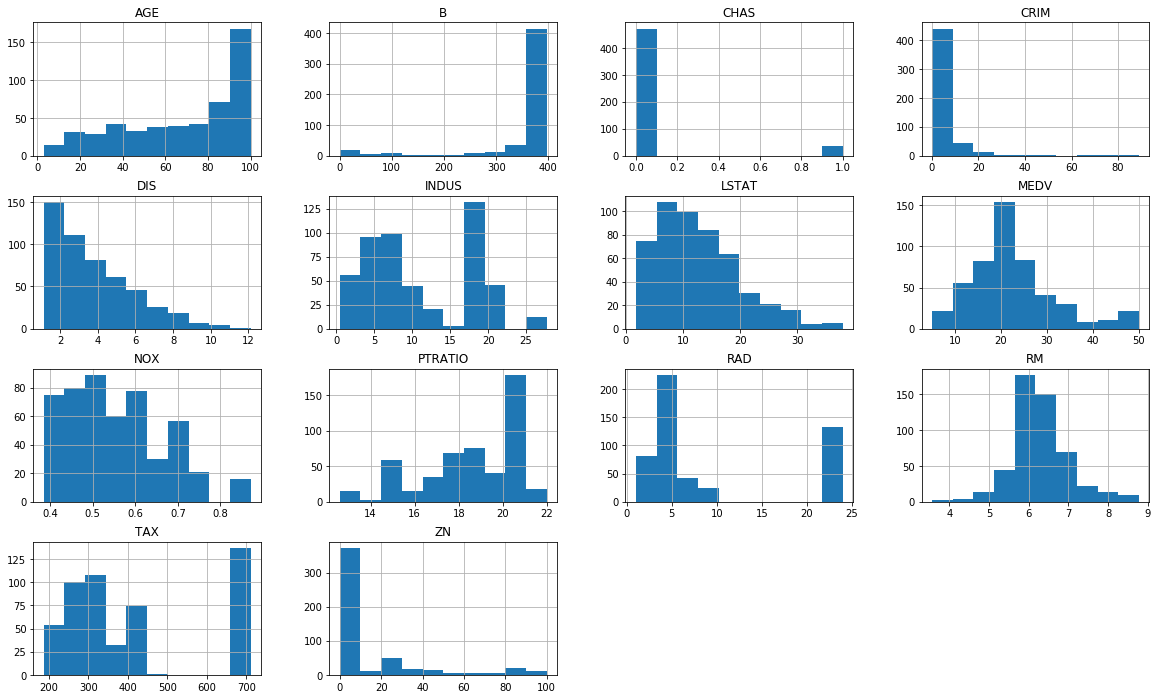

In [44]:
import warnings
warnings.simplefilter("ignore", UserWarning)
fig = plt.figure(figsize = (20,12))
ax = fig.gca()
df.hist(ax = ax);

As we can see above the scale varies quite a lot between the different variables. This makes a Rescaling necessary for the PCA to work properly. We are using the the ``StandardScaler`` from the ``sklearn.preprocessing`` module to transform the data onto unit scale (mean = 0, variance = 1).

In [45]:
X_std = StandardScaler().fit_transform(X)

## Suitability Tests

Before we can apply the necessary steps of a PCA we have to perform two statistical tests which measure if a PCA is suitable for the present dataset, the ``Bartlett`` and ``Kaiser-Meyer-Olkin`` test.

### Bartlett's criterion

Bartlett’s test of sphericity checks the null hypothesis that the correlation matrix is equal to the identity matrix. The **identiy matrix** is a n × n square unit matrix with ones on the main diagonal and zeros elsewhere. The **correlation matrix** is a table showing correlation coefficients between variables. The correlation coefficient measure the linear relationship between two variables. The <u>hypothesis should be rejected</u>, so we can continue with the PCA.

In [46]:
# Test Hypothesis
chi_square_value,p_value=calculate_bartlett_sphericity(df)
print('Chi Square Value: \n%s' %chi_square_value)
print('p-Value: \n%s' %p_value)

The p-value of the Bartlett test is zero and therefore statistically significant. We can conclude that the *correlation matrix* is <u>not equal to</u> the *identity matrix* and proceed with the next test.

### Kaiser-Meyer-Olkin criterion

The *Kaiser-Meyer-Olkin* (KMO) test also measures the suitability of a dataset for Principal component analysis. The minimal overall value for all features <u>should be above 0.6</u>. 

In [48]:
# Calculate KMO
kmo_all, kmo_model = calculate_kmo(X_std)
print('Overall KMO: \n%s' %kmo_model)

The *overall value* is **0.85** which is a fantastic value. This value indicates that we can proceed with the next steps.

## Create Covariance Matrix

The *covariance matrix* is a measure which measures <u>how variables are associated with one another</u>. The covariance between two variables can be computed by this formular:

$$ \sigma_{j k}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i j}-\bar{x}_{j}\right)\left(x_{i k}-\bar{x}_{k}\right) $$

We calculate the Covariance Matrix because the *Eigendecomposition* which is applied in the classic method of a PCA requires this matrix.

In [50]:
cov_mat = np.cov(X_std.T)
print('Covariance matrix: \n%s' %cov_mat[0:4])  # only a sample of features

## Apply Matrix decompensation (Eigendecomposition) 

**Eigendecomposition** of a matrix is a type of decomposition that involves <u>decomposing a square matrix</u> into a set of *eigenvectors* and *eigenvalues*. We use Singular Value Decomposition (SVD) which is the fastest approach to do a Matrix decomposition.

**Eigenvectors** are *unit vectors*, which means that their length or magnitude is equal to 1.0. Eigenvectors are *column vectors* with shape (1, n). **Eigenvalues** are coefficients applied to eigenvectors that give the vectors their length or magnitude.

In [52]:
eig_vecs, eig_vals, _ = np.linalg.svd(cov_mat)

In [53]:
print('Eigenvectors \n%s' %eig_vecs[0:4])
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.2509514  -0.31525237  0.24656649  0.06177071  0.08215692 -0.21965961
   0.77760721 -0.15335048  0.26039028 -0.01936913  0.10964435  0.08676107
  -0.0459523 ]
 [ 0.25631454 -0.3233129   0.29585782  0.12871159  0.32061699 -0.3233881
  -0.27499628  0.40268031  0.35813749 -0.26752723 -0.26275629 -0.07142528
   0.08091897]
 [-0.34667207  0.11249291 -0.01594592  0.01714571 -0.00781119 -0.0761379
  -0.33957645 -0.17393172  0.64441615  0.36353226  0.30316943 -0.11319963
   0.25107654]
 [-0.00504243  0.45482914  0.28978082  0.81594136  0.08653094  0.16749014
   0.07413621  0.02466215 -0.01372777  0.00618184 -0.01392667 -0.00398268
  -0.03592171]]

Eigenvalues 
[6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]


## Compute and evaluate Explained Variance

The *eigenvectors* only define the direction or magnitude of an axis since their unit length is normed to a length of 1. In order to decide <u>which eigenvectors should be dropped</u> when creating a lower dimensional subspace we have to evaluate the *eigenvalues*. The **explained variance** is a measurement based on these eigenvalues which can tell us how much information can be attributed to each principal component.

In [54]:
# Calculate individual and cumulated variance
tot_var = sum(eig_vals)
exp_var = (eig_vals / tot_var)*100
cum_exp_var = np.cumsum(exp_var)

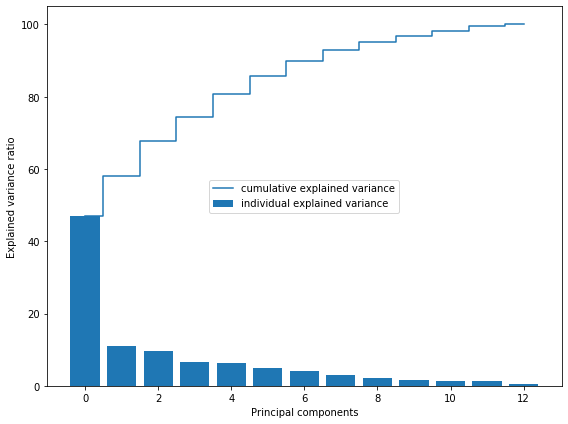

In [55]:
# Plot variance to graph
plt.figure(figsize=(8, 6))
plt.bar(range(len(exp_var)), exp_var, 
        label='individual explained variance')
plt.step(range(len(exp_var)), cum_exp_var, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='center')
plt.tight_layout();

The essential question now is: <u>How do we choose the number of principal components</u> which should represent our dataset? There are basically **four viable methods** for picking the number of components:
- **Method 1**: We select how many dimensions we want to keep based on our analysis goal. Perhaps we want to visually represent data in two dimensions which would mean we keep two principal components
- **Method 2**: Calculate the cumulative explained variance (as in the graph above) and select as many principal components until a defined threshold is reached (typical would be a value of 80%).
- **Method 3**: Calculate the individual explained variance for each component and look for a significant drop in explained variance. Then pick alle components before the big drop. This approach is also called 'find the elbow'.
- **Method 4**: Compute the individual explained variance and only pick those princripal components which explain at least 10% of the total variance

## Projection Matrix

Finally we will construct the **Projection Matrix W** which we will use to transform the orginal dataset to a lower dimensional space. In this our case i will choose the three principal components as basis for the projection matrix since <u>i want to create a three dimensional visualization</u> of our dataset (*Method 1*).

In [56]:
# Pick first three eigenvectors
matrix_w = eig_vecs[:, 0:3]
print(f'\nShape of Projection Matrix: {matrix_w.shape}')
print('\nProjection Matrix: \n%s' %matrix_w)

With help of this **Projection Matrix** we can <u>create the lower dimensional dataset</u> which contains new values for each observation. As you can see the new dataset only has three dependant variables: ``PC1``, ``PC2``, ``PC3``. I created three new values (``cheap``, ``moderate``, ``expensive``) for the target variable ``MEDV`` which represents the price of a house and will be used for coloring.

In [61]:
# Create new feature space with principal components
result = pd.DataFrame(X_std.dot(matrix_w))
result.columns = ['PC1', 'PC2', 'PC3']
result = pd.concat([result, pd.cut(y, bins=[0, 15, 30, 50], 
                    labels=['cheap', 'moderate', 'expensive'])], axis=1)

In [62]:
result.head(10)

,PC1,PC2,PC3,MEDV
0,2.098297,0.773113,0.342943,moderate
1,1.457252,0.591985,-0.695199,moderate
2,2.074598,0.599639,0.167122,expensive
3,2.611504,-0.006871,-0.100284,expensive
4,2.458185,0.097712,-0.075348,expensive
5,2.214852,-0.009487,-0.672381,moderate
6,1.358881,0.349872,-0.371999,moderate
7,0.842045,0.577800,-0.518540,moderate
8,0.179928,0.342518,-1.349639,moderate
9,1.074184,0.316201,-0.558469,moderate


## Visualize dataset

Finally let's plot the *principal components* in a <u>three dimensional space</u> and use the recoded target variable for colouring.

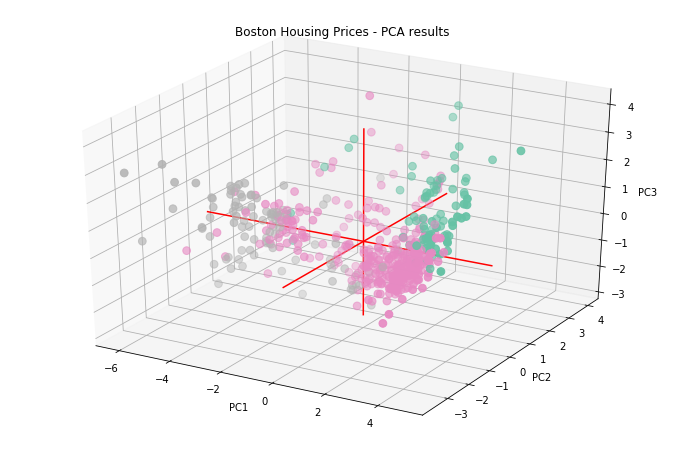

In [59]:
# Plot initialisation
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PC1'], result['PC2'], result['PC3'], c=result['MEDV'].cat.codes, cmap="Set2_r", s=60)
 
# Make simple, bare axis lines through space (red):
xAxisLine = ((min(result['PC1']), max(result['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PC2']), max(result['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PC3']), max(result['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# Label the axes, title and legend
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Boston Housing Prices - PCA results");

# Summary
---

Let's summarize what what have learned about PCA:

- PCA is used to <u>overcome features redundancy</u> in a data set.
- These features are low dimensional in nature.
- These features a.k.a components are a resultant of normalized *linear combination* of original predictor variables.
- These components aim to capture as much information as possible with *high explained variance*.
- The *first component* has the <u>highest variance</u> followed by second, third and so on.
- *Normalizing data* becomes extremely <u>important</u> when the predictors are measured in different units.
- PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the - resultant cloud of data.
- PCA is applied on a data set with <u>numeric variables</u>.
- PCA is a tool which helps to produce <u>better visualizations of high dimensional data</u>.
